<a href="https://colab.research.google.com/github/Zubek7/krycha-/blob/main/laptopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      laptop_ID Company                              Product  \
0             1   Apple                          MacBook Pro   
1             2   Apple                          Macbook Air   
2             3      HP                               250 G6   
3             4   Apple                          MacBook Pro   
4             5   Apple                          MacBook Pro   
...         ...     ...                                  ...   
1298       1316  Lenovo                       Yoga 500-14ISK   
1299       1317  Lenovo                       Yoga 900-13ISK   
1300       1318  Lenovo                   IdeaPad 100S-14IBR   
1301       1319      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon   
1302       1320    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)   

                TypeName  Inches                            ScreenResolution  \
0              Ultrabook    13.3          IPS Panel Retina Display 2560x1600   
1              Ultrabook    13.3                                    144

<ipython-input-2-324d5622d73c>:45: FutureWarning: The default value of regex will change from True to False in a future version.
  lpdata['first'] = lpdata['first'].str.replace(r'\D', '')
<ipython-input-2-324d5622d73c>:51: FutureWarning: The default value of regex will change from True to False in a future version.
  lpdata['second'] = lpdata['second'].str.replace(r'\D', '')
<ipython-input-2-324d5622d73c>:74: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train.corr()


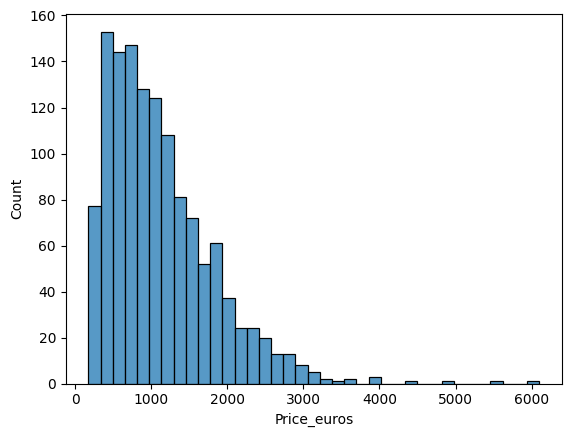

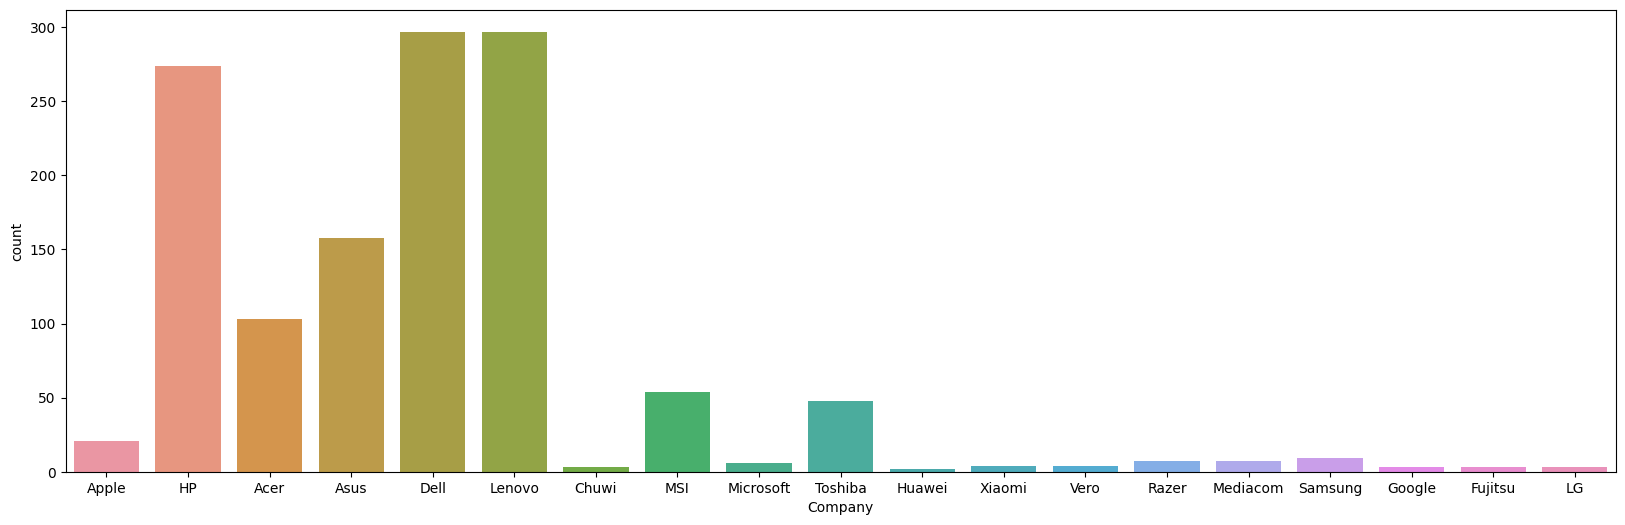

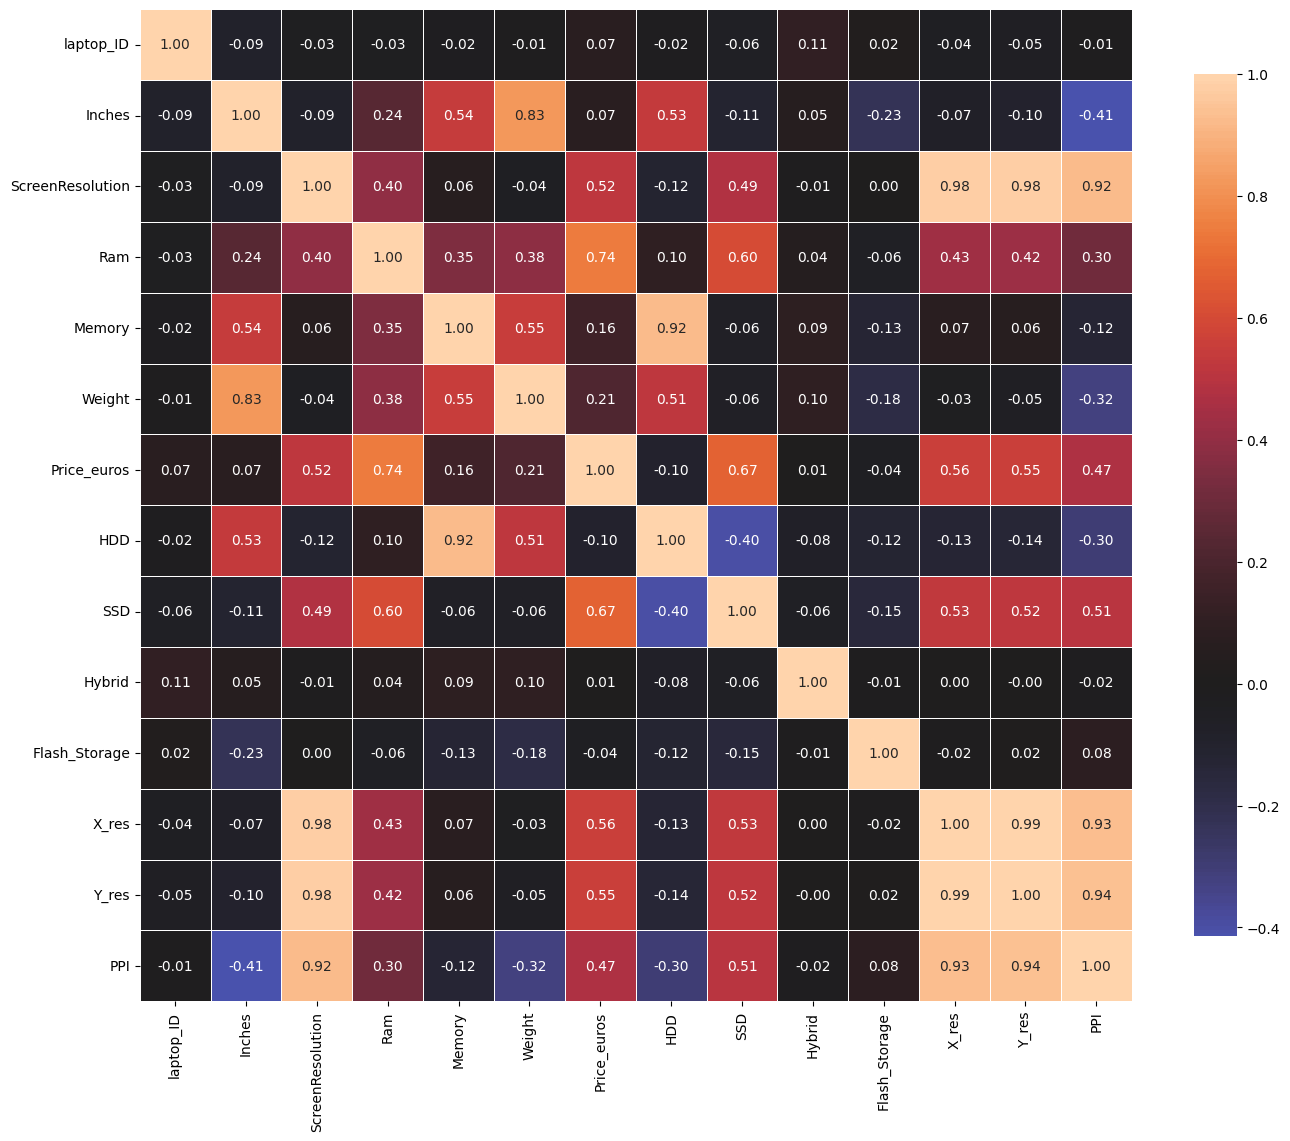

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
lpdata = pd.read_csv('/content/laptop_price.csv', encoding='latin-1')
lpdata.head()
print(lpdata.round(2))
X = lpdata[['Company', 'Product']]
y = lpdata['Price_euros']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.head()
X_test.head()
X = lpdata[['Company', 'Product']]
y = lpdata['Price_euros']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)
X_train.head()
X_test.head()
lpdata.describe()
lpdata.info()
# sprawdz rozkład zmiennej 'price'
print(lpdata['Price_euros'].min())
print(lpdata['Price_euros'].max())
sns.histplot(lpdata['Price_euros'])
lpdata['Company'].value_counts()
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Company", data=lpdata, ax=ax)
lpdata["Ram"] = lpdata["Ram"].str.replace('GB', '')
lpdata["Weight"] = lpdata["Weight"].str.replace('kg', '')
lpdata['Memory'] = lpdata['Memory'].astype(str).replace('\.0', '', regex=True)
lpdata["Memory"] = lpdata["Memory"].str.replace('GB', '')
lpdata["Memory"] = lpdata["Memory"].str.replace('TB', '000')
nowy3 = lpdata["Memory"].str.split("+", n = 1, expand = True)
lpdata["first"]= nowy3[0]
lpdata["first"]=lpdata["first"].str.strip()
lpdata["second"]= nowy3[1]
lpdata["Layer1HDD"] = lpdata["first"].apply(lambda x: 1 if "HDD" in x else 0)
lpdata["Layer1SSD"] = lpdata["first"].apply(lambda x: 1 if "SSD" in x else 0)
lpdata["Layer1Hybrid"] = lpdata["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
lpdata["Layer1Flash_Storage"] = lpdata["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
lpdata['first'] = lpdata['first'].str.replace(r'\D', '')
lpdata["second"].fillna("0", inplace = True)
lpdata["Layer2HDD"] = lpdata["second"].apply(lambda x: 1 if "HDD" in x else 0)
lpdata["Layer2SSD"] = lpdata["second"].apply(lambda x: 1 if "SSD" in x else 0)
lpdata["Layer2Hybrid"] = lpdata["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
lpdata["Layer2Flash_Storage"] = lpdata["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
lpdata['second'] = lpdata['second'].str.replace(r'\D', '')
lpdata["first"] = lpdata["first"].astype(int)
lpdata["second"] = lpdata["second"].astype(int)
lpdata["Total_Memory"]=(lpdata["first"]*(lpdata["Layer1HDD"]+lpdata["Layer1SSD"]+lpdata["Layer1Hybrid"]+lpdata["Layer1Flash_Storage"])+lpdata["second"]*(lpdata["Layer2HDD"]+lpdata["Layer2SSD"]+lpdata["Layer2Hybrid"]+lpdata["Layer2Flash_Storage"]))
lpdata["Memory"]=lpdata["Total_Memory"]
lpdata["HDD"]=(lpdata["first"]*lpdata["Layer1HDD"]+lpdata["second"]*lpdata["Layer2HDD"])
lpdata["SSD"]=(lpdata["first"]*lpdata["Layer1SSD"]+lpdata["second"]*lpdata["Layer2SSD"])
lpdata["Hybrid"]=(lpdata["first"]*lpdata["Layer1Hybrid"]+lpdata["second"]*lpdata["Layer2Hybrid"])
lpdata["Flash_Storage"]=(lpdata["first"]*lpdata["Layer1Flash_Storage"]+lpdata["second"]*lpdata["Layer2Flash_Storage"])
new = lpdata["ScreenResolution"].str.split("x", n = 1, expand = True)
lpdata["X_res"]= new[0]
lpdata["Y_res"]= new[1]
lpdata["Y_res"]= pd.to_numeric(lpdata["Y_res"])
lpdata["Y_res"]= lpdata["Y_res"].astype(float)
lpdata["X_res"]=(lpdata['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: pd.Series(x).astype(int)).mean(1))
lpdata["X_res"]=pd.to_numeric(lpdata["X_res"])
lpdata["PPI"]=(((lpdata["X_res"]**2+lpdata["Y_res"]**2)**(1/2))/lpdata["Inches"]).astype(float)
lpdata["ScreenResolution"]=(lpdata["X_res"]*lpdata["Y_res"]).astype(float)
lpdata["Ram"] = lpdata["Ram"].astype(int)
lpdata["Weight"] = lpdata["Weight"].astype(float)
lpdata=lpdata.drop(['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage','Total_Memory'],axis=1)
lpdata
def correlation_heatmap(train):
    correlations = train.corr()
    fig, ax = plt.subplots(figsize=(16,16))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink":.70})
    plt.show()
correlation_heatmap(lpdata)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy.stats import zscore
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


X = lpdata[['Ram','Inches', 'HDD','SSD', 'Hybrid' ,'Flash_Storage', 'PPI']]
y=lpdata['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)


model = LinearRegression()
model.fit(X_train,y_train)


y_pred = model.predict(X_test)


r2_score(y_test, y_pred)


0.7717649078257346

In [ ]:
lpdata